In [18]:
import matplotlib.pyplot as plt
from pyspark.shell import spark
from pyspark.sql.functions import hour, second, minute, concat, lit
from pyspark.sql.types import (
    StructType, 
    StructField, 
    StringType, 
    TimestampType,
)

from extract_files import ROOT_PATH, export_proper_events

export_proper_events()
schema = StructType([
    StructField("browser", StringType(), True),
    StructField("device", StringType(), True),
    StructField("event_type", StringType(), True),
    StructField("starting_url", StringType(), True),
    StructField("test_case_id", StringType(), True),
    StructField("timestamp", TimestampType(), True),
    StructField("uuid", StringType(), True),
])

df = spark.read.json(ROOT_PATH + 'serialized_events.json', schema)
df = df.withColumn(
    'created_at', 
    concat(
        hour(df['timestamp']), 
        lit(':'), 
        minute(df['timestamp']), 
        lit(':'), 
        second(df['timestamp'])
    )
)


Py4JJavaError: An error occurred while calling o456.json.
: java.util.ServiceConfigurationError: org.apache.spark.sql.sources.DataSourceRegister: Error accessing configuration file
	at java.base/java.util.ServiceLoader.fail(ServiceLoader.java:581)
	at java.base/java.util.ServiceLoader.access$100(ServiceLoader.java:390)
	at java.base/java.util.ServiceLoader$LazyClassPathLookupIterator.parse(ServiceLoader.java:1172)
	at java.base/java.util.ServiceLoader$LazyClassPathLookupIterator.nextProviderClass(ServiceLoader.java:1205)
	at java.base/java.util.ServiceLoader$LazyClassPathLookupIterator.hasNextService(ServiceLoader.java:1220)
	at java.base/java.util.ServiceLoader$LazyClassPathLookupIterator.hasNext(ServiceLoader.java:1264)
	at java.base/java.util.ServiceLoader$2.hasNext(ServiceLoader.java:1299)
	at java.base/java.util.ServiceLoader$3.hasNext(ServiceLoader.java:1384)
	at scala.collection.convert.Wrappers$JIteratorWrapper.hasNext(Wrappers.scala:42)
	at scala.collection.Iterator$class.foreach(Iterator.scala:891)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1334)
	at scala.collection.IterableLike$class.foreach(IterableLike.scala:72)
	at scala.collection.AbstractIterable.foreach(Iterable.scala:54)
	at scala.collection.TraversableLike$class.filterImpl(TraversableLike.scala:247)
	at scala.collection.TraversableLike$class.filter(TraversableLike.scala:259)
	at scala.collection.AbstractTraversable.filter(Traversable.scala:104)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:630)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:194)
	at org.apache.spark.sql.DataFrameReader.json(DataFrameReader.scala:391)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:564)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.base/java.lang.Thread.run(Thread.java:844)
Caused by: java.nio.file.NoSuchFileException: /home/n3hrox/PycharmProjects/data_engineer/venv/lib/python3.7/site-packages/pyspark/jars/spark-sql_2.11-2.4.1.jar
	at java.base/sun.nio.fs.UnixException.translateToIOException(UnixException.java:92)
	at java.base/sun.nio.fs.UnixException.rethrowAsIOException(UnixException.java:111)
	at java.base/sun.nio.fs.UnixException.rethrowAsIOException(UnixException.java:116)
	at java.base/sun.nio.fs.UnixFileAttributeViews$Basic.readAttributes(UnixFileAttributeViews.java:55)
	at java.base/sun.nio.fs.UnixFileSystemProvider.readAttributes(UnixFileSystemProvider.java:145)
	at java.base/sun.nio.fs.LinuxFileSystemProvider.readAttributes(LinuxFileSystemProvider.java:99)
	at java.base/java.nio.file.Files.readAttributes(Files.java:1755)
	at java.base/java.util.zip.ZipFile$Source.get(ZipFile.java:1220)
	at java.base/java.util.zip.ZipFile$CleanableResource.<init>(ZipFile.java:825)
	at java.base/java.util.zip.ZipFile$CleanableResource$FinalizableResource.<init>(ZipFile.java:852)
	at java.base/java.util.zip.ZipFile$CleanableResource.get(ZipFile.java:841)
	at java.base/java.util.zip.ZipFile.<init>(ZipFile.java:245)
	at java.base/java.util.zip.ZipFile.<init>(ZipFile.java:175)
	at java.base/java.util.jar.JarFile.<init>(JarFile.java:341)
	at java.base/sun.net.www.protocol.jar.URLJarFile.<init>(URLJarFile.java:103)
	at java.base/sun.net.www.protocol.jar.URLJarFile.getJarFile(URLJarFile.java:72)
	at java.base/sun.net.www.protocol.jar.JarFileFactory.get(JarFileFactory.java:99)
	at java.base/sun.net.www.protocol.jar.JarURLConnection.connect(JarURLConnection.java:125)
	at java.base/sun.net.www.protocol.jar.JarURLConnection.getInputStream(JarURLConnection.java:155)
	at java.base/java.util.ServiceLoader$LazyClassPathLookupIterator.parse(ServiceLoader.java:1164)
	... 27 more


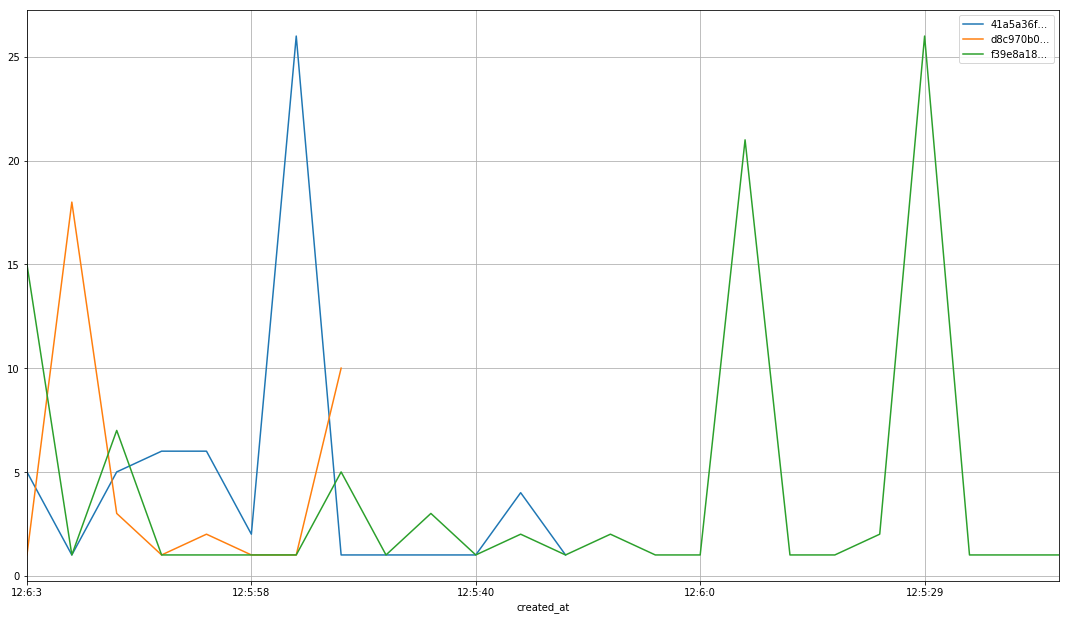

In [14]:
test_case_df = df.groupBy('test_case_id', 'created_at').agg({'uuid': 'count'})
test_case_pdf = test_case_df.toPandas()
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for name, group in test_case_pdf.groupby('test_case_id'):
    group.plot(
        x='created_at', y='count(uuid)', ax=ax, 
        label=name[:8] + '...', grid=True
    )


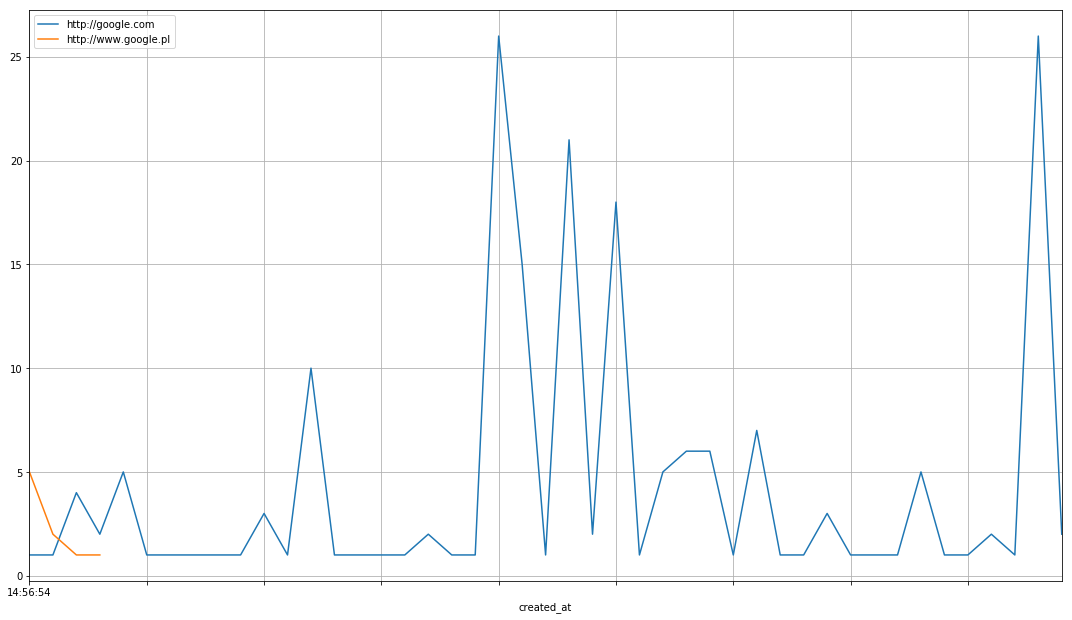

In [12]:
starting_url_df = df.groupBy(
    'starting_url', 'created_at'
).agg({'uuid': 'count'})
starting_url_pdf = starting_url_df.toPandas()
starting_url_pdf.to_parquet('starting_url.parquet.gzip', compression='gzip')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
for name, group in starting_url_pdf.groupby('starting_url'):
    group.plot(x='created_at', y='count(uuid)', ax=ax, label=name, grid=True)


In [15]:
test_case_pdf.to_parquet('test_case_id.parquet.gzip', compression='gzip')
starting_url_pdf.to_parquet('starting_url.parquet.gzip', compression='gzip')

